In [1]:
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import  GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from PyEMD import EEMD

In [2]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv',header=0,index_col=0,parse_dates=[0])
series = series.resample('10T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                      frame.len
Dateandtime                    
2003-12-07 05:30:00   94839.435
2003-12-07 05:40:00   59537.895
2003-12-07 05:50:00   60293.757
2003-12-07 06:00:00   83634.900
2003-12-07 06:10:00  130818.833
13105


In [3]:
eemd = EEMD()
IMF = eemd.eemd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])

13105
13105
13105
13
-------trying loop--------
IMF: 0
[ 10572.21421127  -9152.75023279  -9478.59297575 ... -54716.51356806
  92796.83272191 -95885.41812442]
IMF: 1
[ -2803.10203185 -13670.12794482 -14526.07745006 ...  31264.48107655
  33335.62092128 -38884.80865002]
IMF: 2
[ -3446.28998819  -5406.30511046  -3606.53061258 ...   9268.8425885
    971.58325548 -12188.58798338]
IMF: 3
[-4283.95848511 -5367.19864576 -6260.97076435 ...  2348.43035315
 -1211.97285457 -4326.48914635]
IMF: 4
[10429.8412433  11496.66324513 12723.05978511 ... 22707.03283062
 21131.68991679 19388.55443845]
IMF: 5
[-34338.52402101 -34287.61947436 -34184.11411508 ...  44397.65965794
  43733.220236    42833.45710243]
IMF: 6
[ -3564.47391665  -4020.34364504  -4485.15854827 ... -10594.43112945
 -10791.26216011 -11033.33757491]
IMF: 7
[-23993.18773999 -24088.13569228 -24179.45070891 ... -42249.17428367
 -42031.59319036 -41812.71968415]
IMF: 8
[-21642.59956301 -21653.37175993 -21662.24171457 ... -72615.32884784
 -72499.4

In [4]:
IMF.shape[0]+1

14

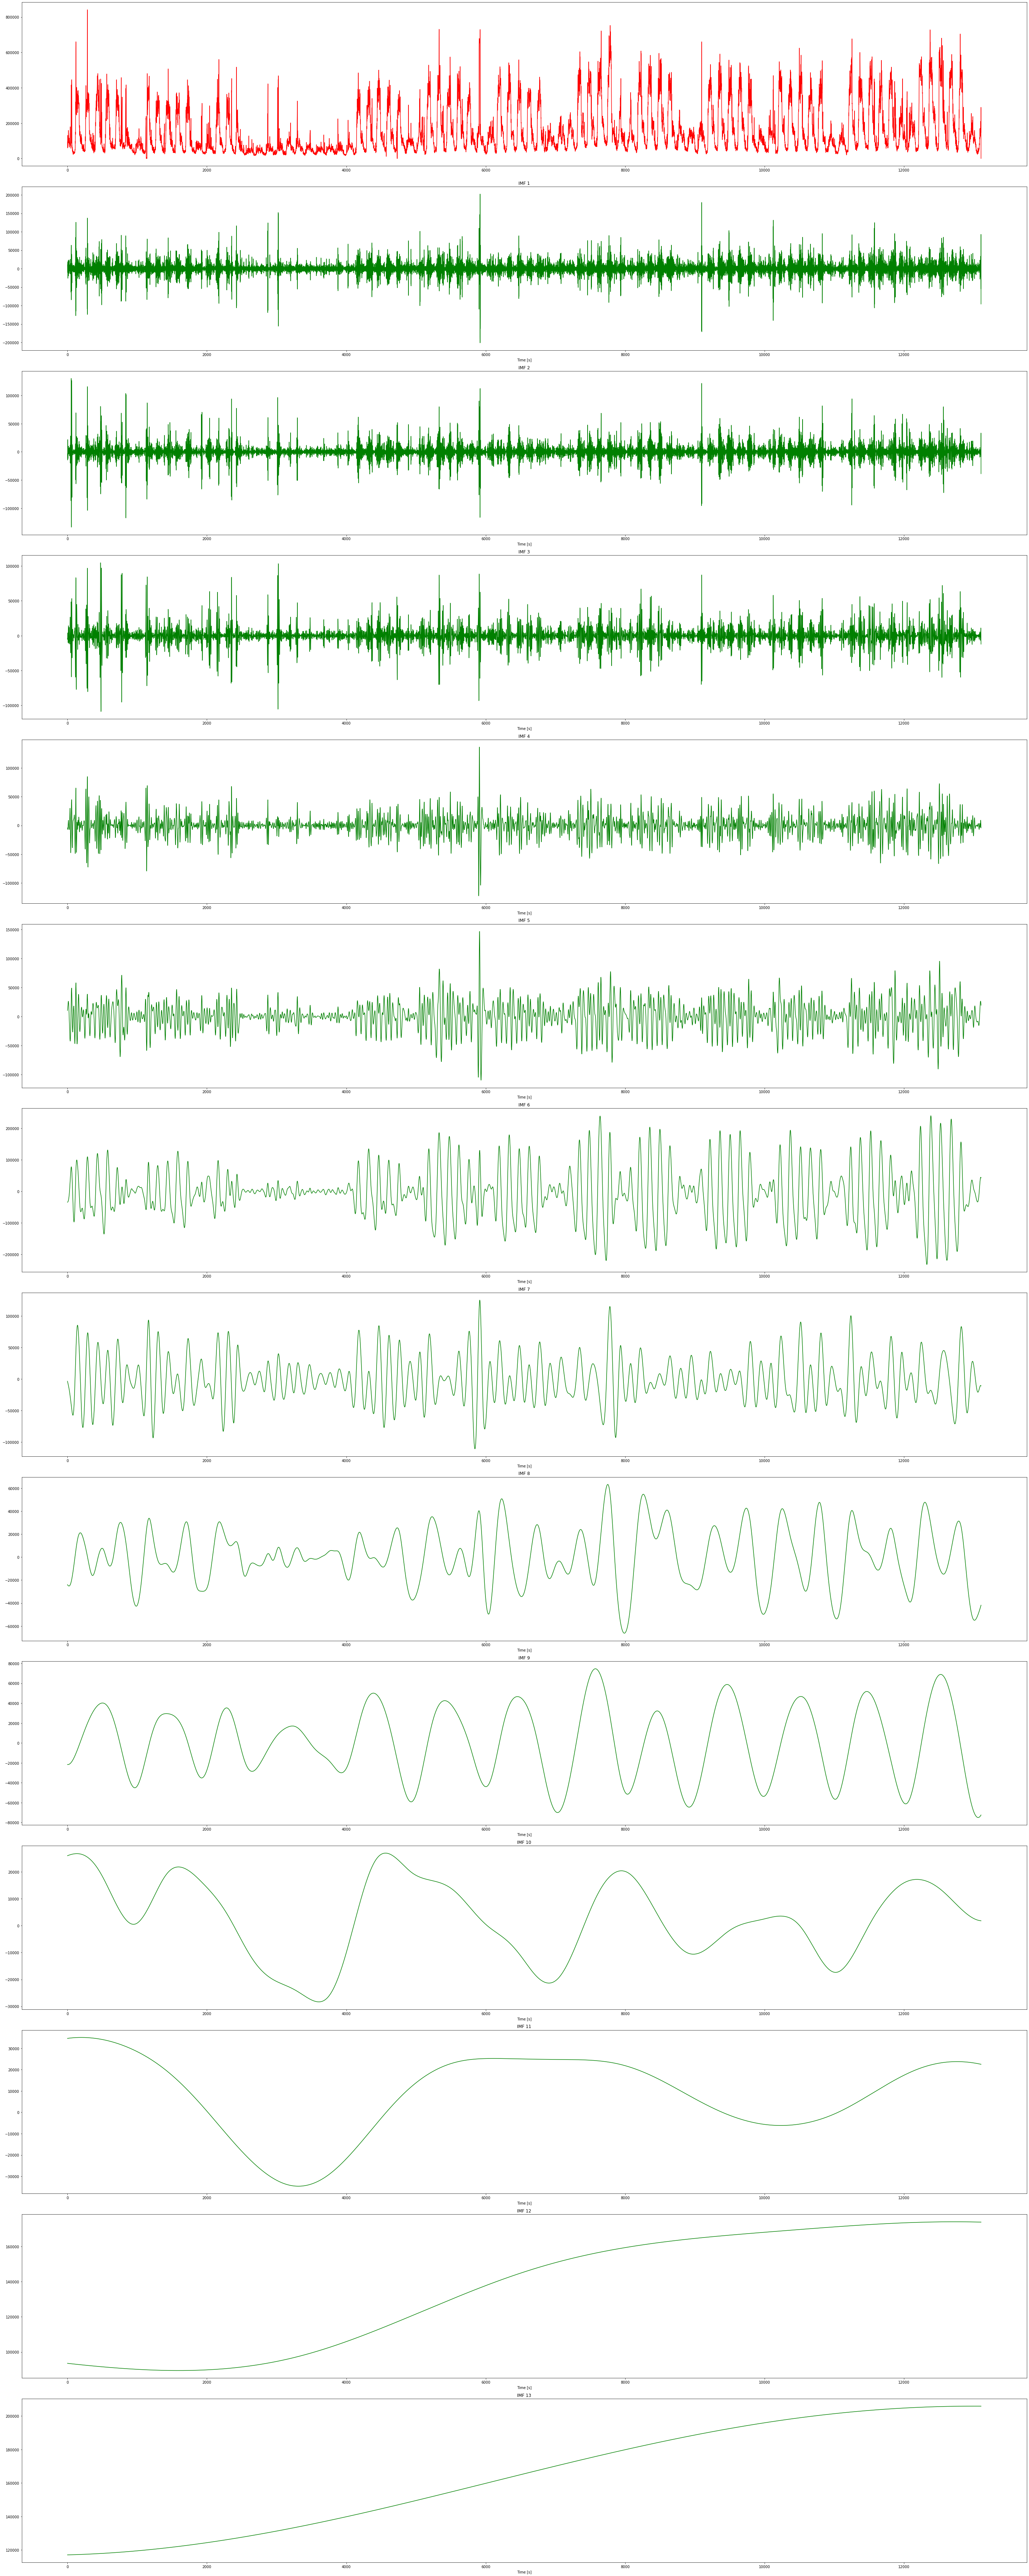

In [6]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
#plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
#plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [7]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)  

In [8]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

10484
10485 2621


In [9]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

10484
10485 2621


In [10]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

10484
10485 2621


In [11]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

10484
10485 2621


In [12]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

10484
10485 2621


In [14]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

10484
10485 2621


In [15]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

10484
10485 2621


In [16]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

10484
10485 2621


In [17]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

10484
10485 2621


In [18]:
j = int(len(IMF[9])*0.8)
print(j)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

10484
10485 2621


In [19]:
k = int(len(IMF[10])*0.8)
print(k)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

10484
10485 2621


In [20]:
l = int(len(IMF[11])*0.8)
print(l)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

10484
10485 2621


In [21]:
m = int(len(IMF[12])*0.8)
print(m)
train_data_12, test_data_12 = IMF[12][0:a+1], IMF[12][a:]
print(len(train_data_12),len(test_data_12))
X_train_12, y_train_12 = create_dataset(train_data_12, time_step)
X_test_12, y_test_12 = create_dataset(test_data_12, time_step)

10484
10485 2621


In [22]:
train_data_1

array([-2.80310203e+03, -1.36701279e+04, -1.45260775e+04, ...,
       -2.11875785e+03, -1.00765566e+01,  9.97229763e+03])

In [23]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# RandomForestRegressor parameter pruning

In [25]:
from sklearn.model_selection import GridSearchCV
import numpy as np
max_features_range=np.arange(1,6,1)
n_estimators_range=np.arange(10,60,10)
param_grid=dict(max_features=max_features_range,n_estimators=n_estimators_range)
rf = RandomForestRegressor()
grid_rf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)

# XGBRegressor parameter pruning

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#max_features_range=np.arange(1,6,1)
n_estimators_range=np.arange(10,60,10)
param_grid=dict(n_estimators=n_estimators_range)
xgbr = XGBRegressor()
grid_xgb=GridSearchCV(estimator=xgbr,param_grid=param_grid,cv=5)

# LGBMRegressor parameter pruning

In [43]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#max_features_range=np.arange(1,6,1)
n_estimators_range=np.arange(10,60,10)
param_grid=dict(n_estimators=n_estimators_range)
lgb = LGBMRegressor()
grid_lgbm=GridSearchCV(estimator=lgb,param_grid=param_grid,cv=5)

# High Frequency (IMF[0], IMF[1], IMF[2], IMF[3])

# Random Forest

In [45]:
grid_rf.fit(X_train_0,y_train_0)
rf_pred_0 = grid_rf.best_estimator_.predict(X_test_0)


grid_rf.fit(X_train_1,y_train_1)
rf_pred_1 = grid_rf.best_estimator_.predict(X_test_1)


grid_rf.fit(X_train_2,y_train_2)
rf_pred_2 = grid_rf.best_estimator_.predict(X_test_2)

grid_rf.fit(X_train_3,y_train_3)
rf_pred_3 = grid_rf.best_estimator_.predict(X_test_3)


final_rf_pred = rf_pred_0+rf_pred_1+rf_pred_2+rf_pred_3

actual_y_test = y_test_0+y_test_1+y_test_2+y_test_3
rfh=[]
rfh.append("RandomForest")
rfh.append("HighFrequency")
rfh.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 21213.903
Root Mean Squared Error : 31392.616
Mean Squared Error : 985496313.013
MAPE  :528.009
Normalized Root Mean Squared Error : 0.075


# XG Boost

In [46]:
grid_xgb.fit(X_train_0,y_train_0)
xgbr_pred_0 = grid_xgb.best_estimator_.predict(X_test_0)


grid_xgb.fit(X_train_1,y_train_1)
xgbr_pred_1 = grid_xgb.best_estimator_.predict(X_test_1)


grid_xgb.fit(X_train_2,y_train_2)
xgbr_pred_2 = grid_xgb.best_estimator_.predict(X_test_2)

grid_xgb.fit(X_train_3,y_train_3)
xgbr_pred_3 = grid_xgb.best_estimator_.predict(X_test_3)


final_xgbr_pred = xgbr_pred_0+xgbr_pred_1+xgbr_pred_2+xgbr_pred_3
xgh=[]
xgh.append("XG Boost")
xgh.append("HighFrequency")
xgh.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 17820.483
Root Mean Squared Error : 27467.024
Mean Squared Error : 754437384.857
MAPE  :472.425
Normalized Root Mean Squared Error : 0.065


# LGBM

In [47]:
grid_lgbm.fit(X_train_0,y_train_0)
Lgbm_pred_0 = grid_lgbm.best_estimator_.predict(X_test_0)


grid_lgbm.fit(X_train_1,y_train_1)
Lgbm_pred_1 = grid_lgbm.best_estimator_.predict(X_test_1)


grid_lgbm.fit(X_train_2,y_train_2)
Lgbm_pred_2 = grid_lgbm.best_estimator_.predict(X_test_2)

grid_lgbm.fit(X_train_3,y_train_3)
Lgbm_pred_3 = grid_lgbm.best_estimator_.predict(X_test_3)


final_lgb_pred = Lgbm_pred_0+Lgbm_pred_1+Lgbm_pred_2+Lgbm_pred_3

lgbmh=[]
lgbmh.append("LGBM")
lgbmh.append("HighFrequency")
lgbmh.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 17883.734
Root Mean Squared Error : 27554.875
Mean Squared Error : 759271124.541
MAPE  :494.924
Normalized Root Mean Squared Error : 0.066


# Medium Frequency (IMF[4], IMF[5], IMF[6], IMF[7], IMF[8])

# Random Forest

In [48]:
grid_rf.fit(X_train_4,y_train_4)
rf_pred_4 = grid_rf.best_estimator_.predict(X_test_4)

grid_rf.fit(X_train_5,y_train_5)
rf_pred_5 = grid_rf.best_estimator_.predict(X_test_5)

grid_rf.fit(X_train_6,y_train_6)
rf_pred_6 = grid_rf.best_estimator_.predict(X_test_6)

grid_rf.fit(X_train_7,y_train_7)
rf_pred_7 = grid_rf.best_estimator_.predict(X_test_7)

grid_rf.fit(X_train_8,y_train_8)
rf_pred_8 = grid_rf.best_estimator_.predict(X_test_8)



final_rf_pred = rf_pred_4+rf_pred_5+rf_pred_6+rf_pred_7+rf_pred_8

actual_y_test =y_test_4+y_test_5+y_test_6+y_test_7+y_test_8

rfm=[]
rfm.append("RandomForest")
rfm.append("MediumFrequency")
rfm.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 6225.181
Root Mean Squared Error : 8451.130
Mean Squared Error : 71421590.817
MAPE  :76.982
Normalized Root Mean Squared Error : 0.016


# XG Boost

In [49]:
grid_xgb.fit(X_train_4,y_train_4)
xgbr_pred_4 = grid_xgb.best_estimator_.predict(X_test_4)

grid_xgb.fit(X_train_5,y_train_5)
xgbr_pred_5 = grid_xgb.best_estimator_.predict(X_test_5)

grid_xgb.fit(X_train_6,y_train_6)
xgbr_pred_6 = grid_xgb.best_estimator_.predict(X_test_6)

grid_xgb.fit(X_train_7,y_train_7)
xgbr_pred_7 = grid_xgb.best_estimator_.predict(X_test_7)

grid_xgb.fit(X_train_8,y_train_8)
xgbr_pred_8 = grid_xgb.best_estimator_.predict(X_test_8)


final_xgbr_pred = xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8

xgm=[]
xgm.append("XGBoost")
xgm.append("MediumFrequency")
xgm.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 6225.181
Root Mean Squared Error : 8451.130
Mean Squared Error : 71421590.817
MAPE  :76.982
Normalized Root Mean Squared Error : 0.016


# LGBM

In [50]:
grid_lgbm.fit(X_train_4,y_train_4)
Lgbm_pred_4 = grid_lgbm.best_estimator_.predict(X_test_4)

grid_lgbm.fit(X_train_5,y_train_5)
Lgbm_pred_5 = grid_lgbm.best_estimator_.predict(X_test_5)

grid_lgbm.fit(X_train_6,y_train_6)
Lgbm_pred_6 = grid_lgbm.best_estimator_.predict(X_test_6)

grid_lgbm.fit(X_train_7,y_train_7)
Lgbm_pred_7 = grid_lgbm.best_estimator_.predict(X_test_7)

grid_lgbm.fit(X_train_8,y_train_8)
Lgbm_pred_8 = grid_lgbm.best_estimator_.predict(X_test_8)


final_lgb_pred = Lgbm_pred_4+Lgbm_pred_5+Lgbm_pred_6+Lgbm_pred_7+Lgbm_pred_8

lgbmm=[]
lgbmm.append("LGBM")
lgbmm.append("MediumFrequency")
lgbmm.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 6129.938
Root Mean Squared Error : 8399.098
Mean Squared Error : 70544840.402
MAPE  :63.869
Normalized Root Mean Squared Error : 0.016


# Low Frequency (IMF[9], IMF[10], IMF[11], IMF[12])

# Random Forest

In [51]:
grid_rf.fit(X_train_9,y_train_9)
rf_pred_9 = grid_rf.best_estimator_.predict(X_test_9)

grid_rf.fit(X_train_10,y_train_10)
rf_pred_10 = grid_rf.best_estimator_.predict(X_test_10)

grid_rf.fit(X_train_11,y_train_11)
rf_pred_11 = grid_rf.best_estimator_.predict(X_test_11)

grid_rf.fit(X_train_12,y_train_12)
rf_pred_12 = grid_rf.best_estimator_.predict(X_test_12)


final_rf_pred =rf_pred_9+rf_pred_10+rf_pred_11+rf_pred_12

actual_y_test =y_test_9+y_test_10+y_test_11+y_test_12

rfl=[]
rfl.append("RandomForest")
rfl.append("LowFrequency")

rfl.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 7828.054
Root Mean Squared Error : 8575.816
Mean Squared Error : 73544617.937
MAPE  :1.958
Normalized Root Mean Squared Error : 0.135


# XG Boost

In [52]:
grid_xgb.fit(X_train_9,y_train_9)
xgbr_pred_9 = grid_xgb.best_estimator_.predict(X_test_9)

grid_xgb.fit(X_train_10,y_train_10)
xgbr_pred_10 = grid_xgb.best_estimator_.predict(X_test_10)

grid_xgb.fit(X_train_11,y_train_11)
xgbr_pred_11 = grid_xgb.best_estimator_.predict(X_test_11)

grid_xgb.fit(X_train_12,y_train_12)
xgbr_pred_12 = grid_xgb.best_estimator_.predict(X_test_12)

final_xgbr_pred =xgbr_pred_9+xgbr_pred_10+xgbr_pred_11+xgbr_pred_12

xgl=[]
xgl.append("XGBoost")
xgl.append("LowFrequency")

xgl.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 7943.054
Root Mean Squared Error : 8681.012
Mean Squared Error : 75359962.627
MAPE  :1.988
Normalized Root Mean Squared Error : 0.137


# LGBM

In [53]:
grid_lgbm.fit(X_train_9,y_train_9)
Lgbm_pred_9 = grid_lgbm.best_estimator_.predict(X_test_9)

grid_lgbm.fit(X_train_10,y_train_10)
Lgbm_pred_10 = grid_lgbm.best_estimator_.predict(X_test_10)

grid_lgbm.fit(X_train_11,y_train_11)
Lgbm_pred_11 = grid_lgbm.best_estimator_.predict(X_test_11)

grid_lgbm.fit(X_train_12,y_train_12)
Lgbm_pred_12 = grid_lgbm.best_estimator_.predict(X_test_12)


final_lgb_pred =Lgbm_pred_9+Lgbm_pred_10+Lgbm_pred_11+Lgbm_pred_12

lgbml=[]
lgbml.append("LGBM")
lgbml.append("LowFrequency")
lgbml.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 8539.042
Root Mean Squared Error : 9267.725
Mean Squared Error : 85890730.769
MAPE  :2.139
Normalized Root Mean Squared Error : 0.146


# Final

# High - LGBM /// Medium - XG BOOST /// Low - Random Forest

In [54]:
grid_lgbm.fit(X_train_0,y_train_0)
Lgbm_pred_0 = grid_lgbm.best_estimator_.predict(X_test_0)


grid_lgbm.fit(X_train_1,y_train_1)
Lgbm_pred_1 = grid_lgbm.best_estimator_.predict(X_test_1)


grid_lgbm.fit(X_train_2,y_train_2)
Lgbm_pred_2 = grid_lgbm.best_estimator_.predict(X_test_2)

grid_lgbm.fit(X_train_3,y_train_3)
Lgbm_pred_3 = grid_lgbm.best_estimator_.predict(X_test_3)


final_high_pred = Lgbm_pred_0+Lgbm_pred_1+Lgbm_pred_2+Lgbm_pred_3
actual_y_test_high =y_test_0+ y_test_1+y_test_2+y_test_3

lgbf=[]
lgbf.append("LGBM")
lgbf.append("HighFrequency")
lgbf.extend(statistics(actual_y_test_high,final_high_pred))

Mean Absolute Error : 17883.734
Root Mean Squared Error : 27554.875
Mean Squared Error : 759271124.541
MAPE  :494.924
Normalized Root Mean Squared Error : 0.066


In [55]:
grid_xgb.fit(X_train_4,y_train_4)
xgbr_pred_4 = grid_xgb.best_estimator_.predict(X_test_4)

grid_xgb.fit(X_train_5,y_train_5)
xgbr_pred_5 = grid_xgb.best_estimator_.predict(X_test_5)

grid_xgb.fit(X_train_6,y_train_6)
xgbr_pred_6 = grid_xgb.best_estimator_.predict(X_test_6)

grid_xgb.fit(X_train_7,y_train_7)
xgbr_pred_7 = grid_xgb.best_estimator_.predict(X_test_7)

grid_xgb.fit(X_train_8,y_train_8)
xgbr_pred_8 = grid_xgb.best_estimator_.predict(X_test_8)


final_med_pred = xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8
actual_y_test_med =y_test_4+y_test_5+y_test_6+y_test_7+y_test_8

xgbrf=[]
xgbrf.append("XGBoost")
xgbrf.append("MediumFrequency")

xgbrf.extend(statistics(actual_y_test_med,final_med_pred))

Mean Absolute Error : 5453.186
Root Mean Squared Error : 7700.187
Mean Squared Error : 59292883.155
MAPE  :67.768
Normalized Root Mean Squared Error : 0.014


In [56]:
grid_rf.fit(X_train_9,y_train_9)
rf_pred_9 = grid_rf.best_estimator_.predict(X_test_9)

grid_rf.fit(X_train_10,y_train_10)
rf_pred_10 = grid_rf.best_estimator_.predict(X_test_10)

grid_rf.fit(X_train_11,y_train_11)
rf_pred_11 = grid_rf.best_estimator_.predict(X_test_11)

grid_rf.fit(X_train_12,y_train_12)
rf_pred_12 = grid_rf.best_estimator_.predict(X_test_12)


final_low_pred =rf_pred_9+rf_pred_10+rf_pred_11+rf_pred_12

actual_y_test_low =y_test_9+y_test_10+y_test_11+y_test_12

rff=[]
rff.append("RandomForest")
rff.append("LowFrequency")

rff.extend(statistics(actual_y_test_low,final_low_pred))

Mean Absolute Error : 7828.634
Root Mean Squared Error : 8576.377
Mean Squared Error : 73554243.042
MAPE  :1.958
Normalized Root Mean Squared Error : 0.135


In [57]:
actual_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11+y_test_12

In [58]:
final_pred= final_high_pred + final_med_pred + final_low_pred

In [67]:
ensemblef=[]
ensemblef.append("Final")
ensemblef.append("All")
ensemblef.extend(statistics(actual_test,final_pred))

Mean Absolute Error : 16127.927
Root Mean Squared Error : 23050.410
Mean Squared Error : 531321389.991
MAPE  :4.167
Normalized Root Mean Squared Error : 0.035


# RandomForest, XGBoost, LGBM at different Frequencies

In [68]:
df=[]
df.append(rfh)
df.append(xgh)
df.append(lgbmh)
df.append(rfm)
df.append(xgm)
df.append(lgbmm)
df.append(rfl)
df.append(xgl)
df.append(lgbml)
data1=pd.DataFrame(df,columns=['Algorithm','Frequency','MAE','RMSE','MSE','MAPE','NRMSE'])
data1


,Algorithm,Frequency,MAE,RMSE,MSE,MAPE,NRMSE
0,RandomForest,HighFrequency,21213.902790,31392.615581,9.854963e+08,528.009475,0.074637
1,XG Boost,HighFrequency,17820.483099,27467.023589,7.544374e+08,472.425318,0.065304
2,LGBM,HighFrequency,17883.733605,27554.874787,7.592711e+08,494.923908,0.065513
3,RandomForest,MediumFrequency,6225.181392,8451.129559,7.142159e+07,76.981996,0.015678
4,XGBoost,MediumFrequency,6225.181392,8451.129559,7.142159e+07,76.981996,0.015678
5,LGBM,MediumFrequency,6129.938398,8399.097594,7.054484e+07,63.869372,0.015582
6,RandomForest,LowFrequency,7828.054403,8575.815876,7.354462e+07,1.958265,0.134850
7,XGBoost,LowFrequency,7943.053763,8681.011613,7.535996e+07,1.987826,0.136504
8,LGBM,LowFrequency,8539.041566,9267.725221,8.589073e+07,2.139234,0.145730


# High - LGBM /// Medium - XG BOOST /// Low - Random Fores

In [69]:
final=[]
final.append(lgbf)
final.append(xgbrf)
final.append(rff)
final.append(ensemblef)
data2=pd.DataFrame(final,columns=['Algorithm','Frequency','MAE','RMSE','MSE','MAPE','NRMSE'])
data2

,Algorithm,Frequency,MAE,RMSE,MSE,MAPE,NRMSE
0,LGBM,HighFrequency,17883.733605,27554.874787,7.592711e+08,494.923908,0.065513
1,XGBoost,MediumFrequency,5453.186316,7700.187216,5.929288e+07,67.767923,0.014285
2,RandomForest,LowFrequency,7828.634447,8576.377035,7.355424e+07,1.958412,0.134859
3,Final,All,16127.927326,23050.409758,5.313214e+08,4.166551,0.034654
